<h1>Capstone 1: Data Storytelling</h1>
<h2>Wine Quality Data Set, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>

<h2>Import Python Packages</h2>

In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline



<h2>Data Wrangling</h2>

In [3]:
#Import csv files into Pandas data frames
reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")


In [4]:
#Add 'wine type' column to each data frame and population with 'red' or 'white' for each
reddf['wine type'] = 'red'
whitedf['wine type'] = 'white'

In [5]:
#Look at the first few records of combined red wine dataframe with new column
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
#Look at the first few records of combined white wine dataframe with new column
whitedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
#combine the two dataframes for red and white wine into one data frame for all wines
winedf = reddf.append(whitedf, ignore_index=True)

In [8]:
#Look at the first few records of combined Wine data
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
#Look at info for the Wine data
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine type               6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [10]:
# Look at the dimensions of each data set
print("The Wine dataset has", winedf.shape[0], "observations and", 
      winedf.shape[1], "variables")


The Wine dataset has 6497 observations and 13 variables


In [11]:
#Check for null values in Wine data
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

<h2>Descriptive Statitics</h2>

In [12]:
#Descriptive Statistics for Wine Data
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


"Quality" is the attribute we want to be able to predict using the other attributes.  Because it is a categorical variable, mode and median are more meaningful than mean. Let's look more at the values for 'quality' in each data set.

In [13]:
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

fixed acidity maximum: 15.9
fixed acidity minimum: 3.8
fixed acidity range: 12.100000000000001
fixed acidity IQR: 1.2999999999999998
ratio of Range fo IQR: 9.30769230769231

volatile acidity maximum: 1.58
volatile acidity minimum: 0.08
volatile acidity range: 1.5
volatile acidity IQR: 0.17
ratio of Range fo IQR: 8.823529411764705

citric acid maximum: 1.66
citric acid minimum: 0.0
citric acid range: 1.66
citric acid IQR: 0.14
ratio of Range fo IQR: 11.857142857142856

residual sugar maximum: 65.8
residual sugar minimum: 0.6
residual sugar range: 65.2
residual sugar IQR: 6.3
ratio of Range fo IQR: 10.34920634920635

chlorides maximum: 0.611
chlorides minimum: 0.009000000000000001
chlorides range: 0.602
chlorides IQR: 0.027000000000000003
ratio of Range fo IQR: 22.296296296296294

free sulfur dioxide maximum: 289.0
free sulfur dioxide minimum: 1.0
free sulfur dioxide range: 288.0
free sulfur dioxide IQR: 24.0
ratio of Range fo IQR: 12.0

total sulfur dioxide maximum: 440.0
total sulfur d

In [14]:
winedf['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [15]:
winedf.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

Wine Quality


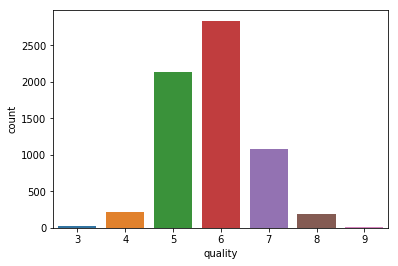

In [16]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=winedf)

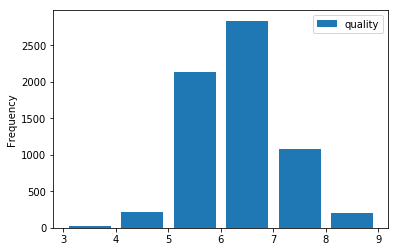

In [17]:
#Histogram of Wine Quality with pyplot
import matplotlib.pyplot as plt
import pandas as pd

winedf[['quality']].plot(kind='hist',bins=[3,4,5,6,7,8,9],rwidth=0.8)
plt.show()

In [18]:
#Reassign Wine Quality to Rating
conditions = [
    (winedf['quality'] >= 7),
    (winedf['quality'] <= 4)
]

rating = ['superior', 'inferior']
winedf['rating'] = np.select(conditions, rating, default='fine')
winedf.rating.value_counts()

fine        4974
superior    1277
inferior     246
Name: rating, dtype: int64

Wine Rating


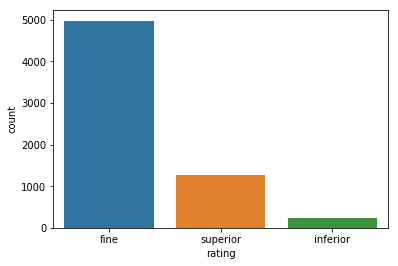

In [19]:
#Histogram of Wine Rating
print('Wine Rating')
sns.countplot(x='rating', data=winedf)

<h2>Histograms</h2>

AttributeError: module 'seaborn' has no attribute 'plt'

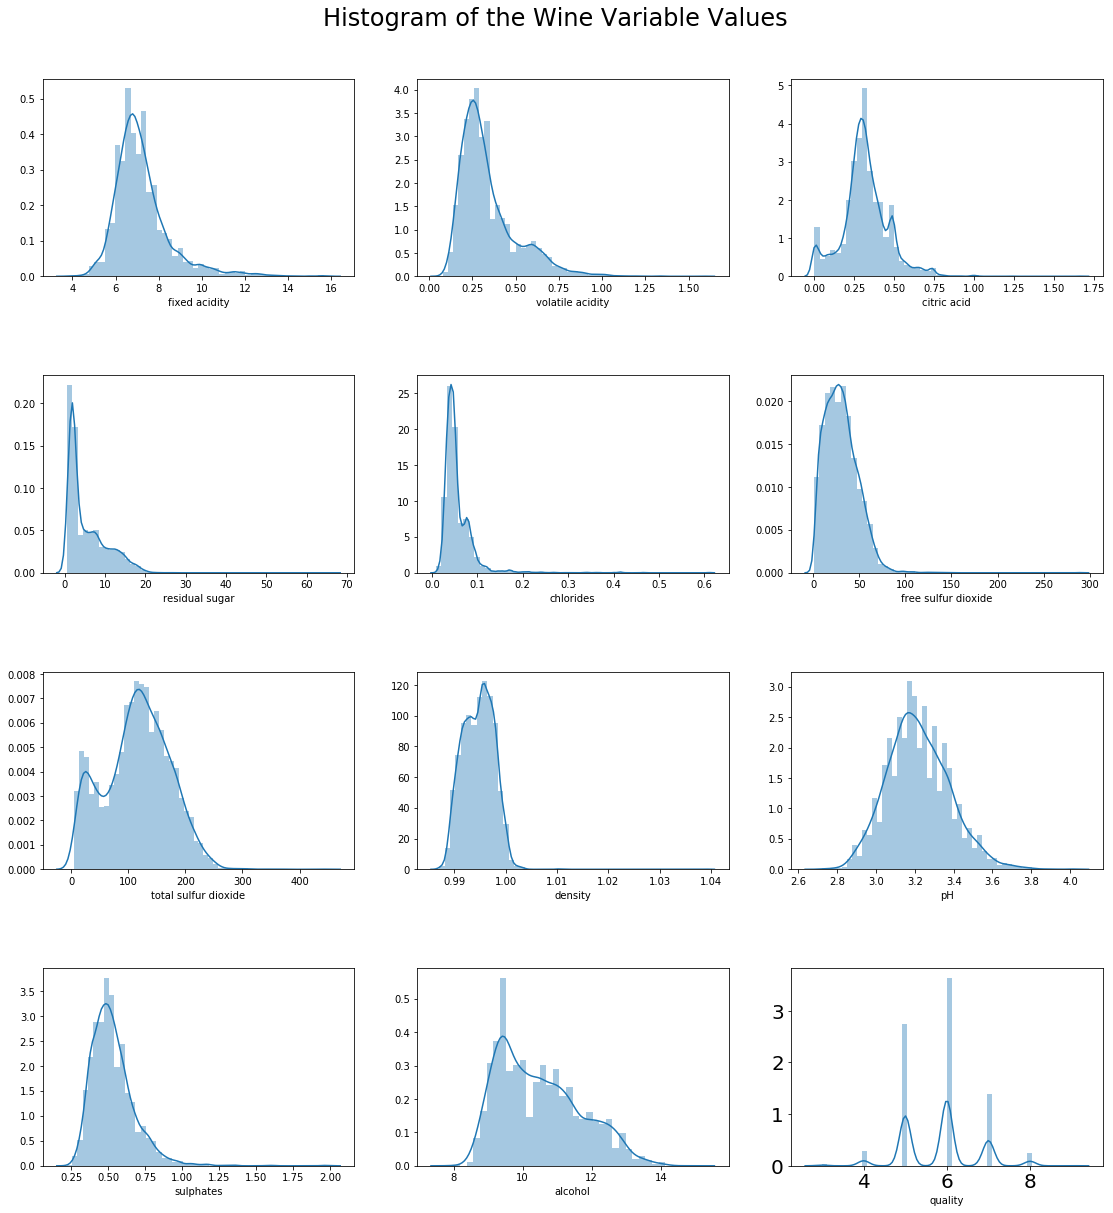

In [20]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(winedf.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    sns.plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myhistplot = subplot_hist(winedf[plot_columns], row = 4, column = 3, title = "Histogram of the Wine Variable Values")






In [21]:
#Histograms Using MatPlotLib instead of Seaborn



# Computing Skewness

In [22]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('Wine Skewness')

skewness_check(winedf[plot_columns])

Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,1.722892,Heavily Skewed
1,volatile acidity,1.494751,Heavily Skewed
2,citric acid,0.471622,Light Skewed
3,residual sugar,1.435073,Heavily Skewed
4,chlorides,5.398581,Heavily Skewed
5,free sulfur dioxide,1.219784,Heavily Skewed
6,total sulfur dioxide,-0.001177,Light Skewed
7,density,0.503485,Heavily Skewed
8,pH,0.386749,Light Skewed
9,sulphates,1.796855,Heavily Skewed


<h2>Box Plots</h2>

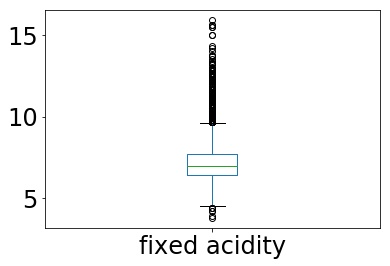

In [23]:
winedf.boxplot(column=['fixed acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/01BoxPlotFixedAcidity.png")

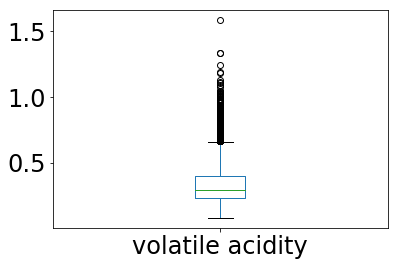

In [24]:
winedf.boxplot(column=['volatile acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/02BoxPlotVolatileAcidity.png")
              

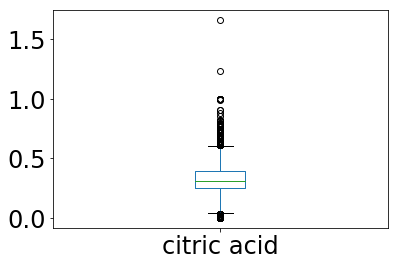

In [25]:
winedf.boxplot(column=['citric acid'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/03BoxPlotCitricAcid.png")

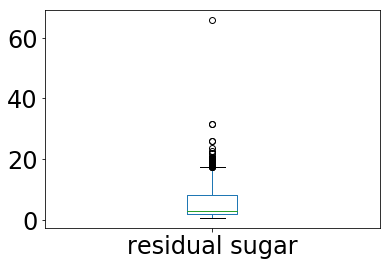

In [26]:
winedf.boxplot(column=['residual sugar'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/04BoxPlotResidualSugar.png")

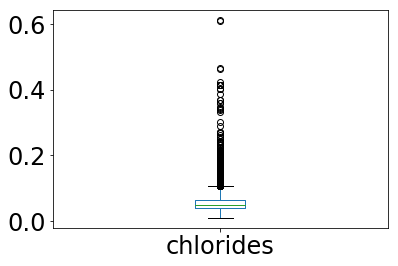

In [27]:
winedf.boxplot(column=['chlorides'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/05BoxChlorides.png")

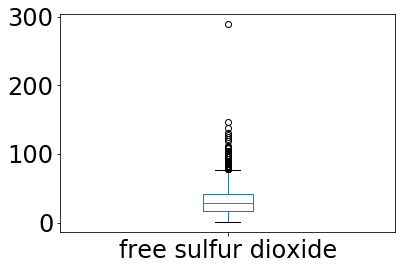

In [28]:
winedf.boxplot(column=['free sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/06BoxPlotFreeSulfurDioxide.png")

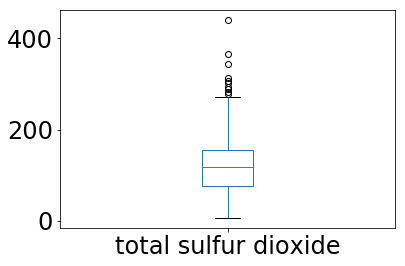

In [29]:
winedf.boxplot(column=['total sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/07BoxPlotTotalSulfurDioxide.png")

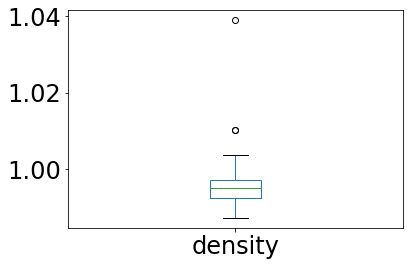

In [30]:
winedf.boxplot(column=['density'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/08BoxPlotDensity.png")

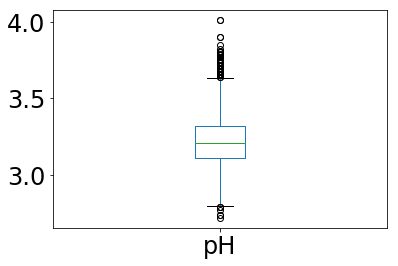

In [31]:
winedf.boxplot(column=['pH'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/09BoxPlotpH.png")

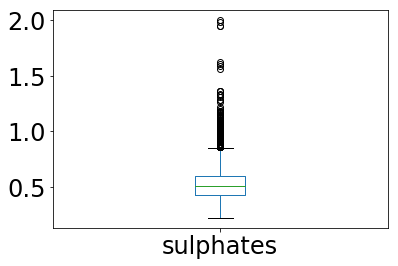

In [32]:
winedf.boxplot(column=['sulphates'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/10BoxPlotSulphates.png")

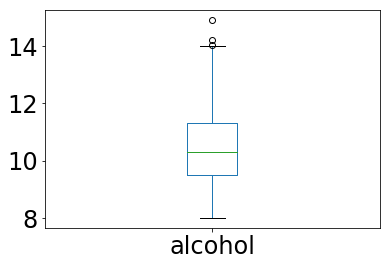

In [33]:
winedf.boxplot(column=['alcohol'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/11BoxPlotAlcohol.png")

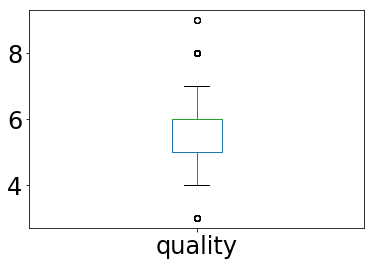

In [34]:
winedf.boxplot(column=['quality'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/12BoxPlotQuality.png")

Observations regarding Wine variables

<ul>
    <li>Quality is normally distributed with a slight left skew. Most values in Quality are concentrated in 5, 6 and 7. Values range from 3 to 9, with no values in 1, 2, or 10.
    <li>All variables have outliers, mostly on the large side (left-skewed).
    <li>The distributions for fixed acidity, volatile acidity and citric acid would be symmetricdal if outliers were removed. 
    <li>In contract, removing outliers from residual sugar would have little or no effect on its skewness; it will remain positively skewed.
    <li>Density and alcohol have only a few outliers, making it different from the other variables
    <li>Alcohol does not have a normal distributiomn. It has an irregular, step-down pattern toward higher alcohol levels. It does not have any pronounced outliers.
    <li>Total Sulfur Dioxide and Density appear to have bimodal distributions.
    <li>Range is much larger compared to the IQR. Mean is usually greater than the median.  These observations indicate that there are outliers in the data set and before any analysis is performed outliers must be taken care of.

</ul>

  

<h2>Correlation Between Target Variable and Predictor Attributes</h2>

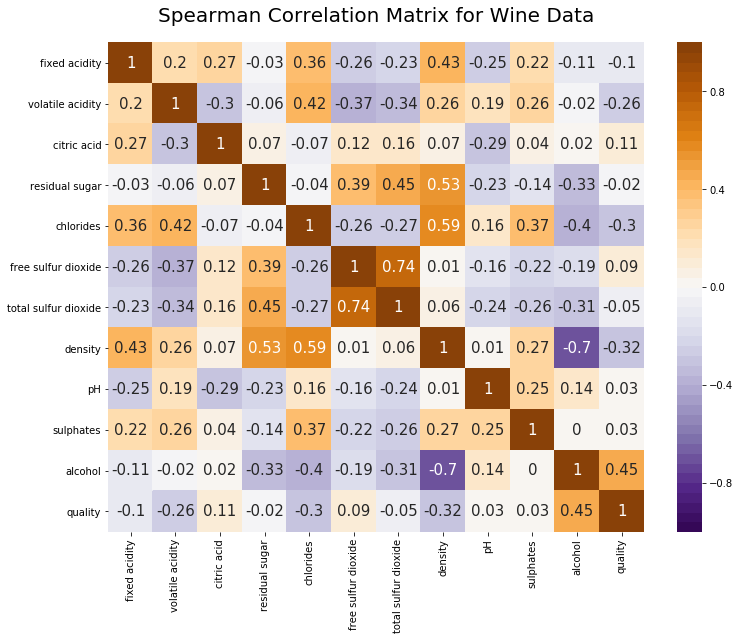

<Figure size 432x288 with 0 Axes>

In [35]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Spearman Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/WineSpearman.png")

In [36]:
winedf.corr(method ="spearman")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446925
citric acid             0.105711
free sulfur dioxide     0.086865
pH                      0.032538
sulphates               0.029831
residual sugar         -0.016891
total sulfur dioxide   -0.054777
fixed acidity          -0.098154
volatile acidity       -0.257806
chlorides              -0.295054
density                -0.322806
Name: quality, dtype: float64

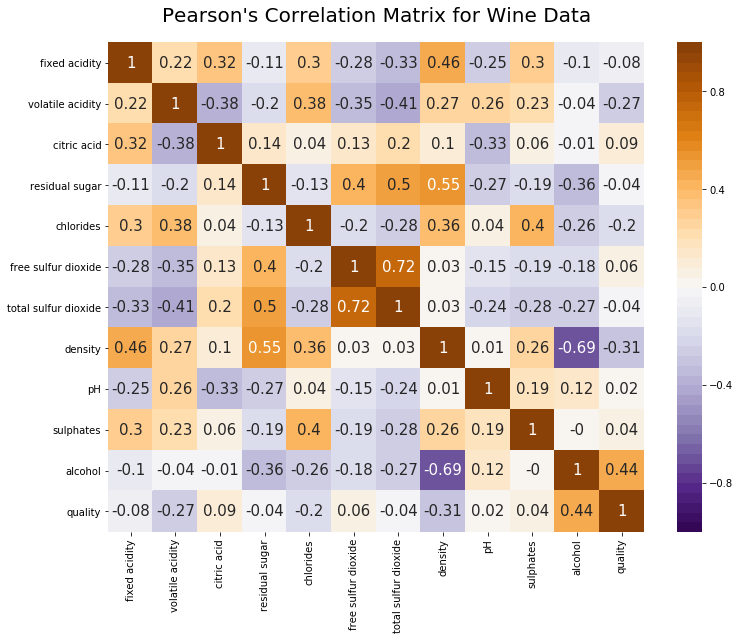

<Figure size 432x288 with 0 Axes>

In [37]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Pearson's Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/WinePearsons.png")

In [38]:
winedf.corr(method ="pearson")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

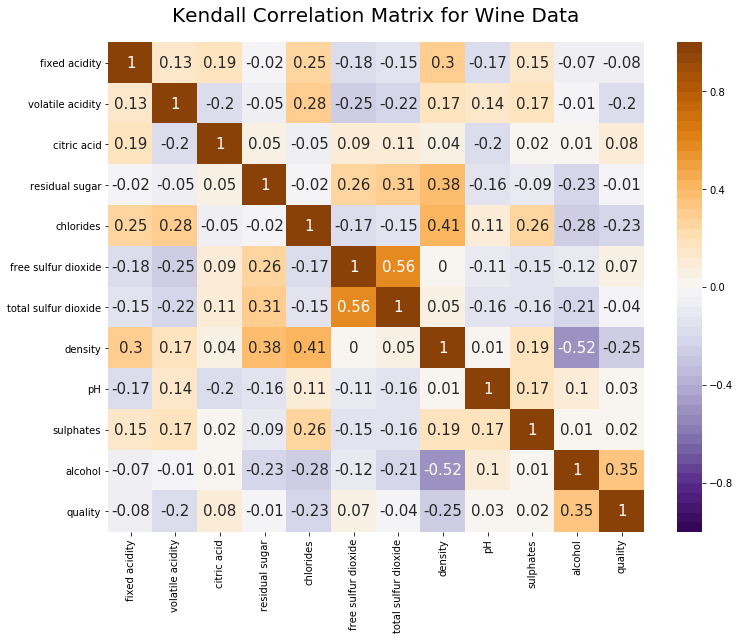

<Figure size 432x288 with 0 Axes>

In [39]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Kendall Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/WineKendall.png")

In [40]:
winedf.corr(method ="kendall")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.352430
citric acid             0.082160
free sulfur dioxide     0.066713
pH                      0.025223
sulphates               0.023679
residual sugar         -0.013097
total sulfur dioxide   -0.042283
fixed acidity          -0.075990
volatile acidity       -0.199101
chlorides              -0.228872
density                -0.247978
Name: quality, dtype: float64

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.45), (2) density (-0.32), (3) chlorides (-0.30), (4) volatile acidity (-0.26), (5) citric acid (.11), (6) fixed acidity (-0.098), (7) free sulfur dioxide (0.087), (8) total sulfur dioxide (-0.055),(9) pH (-0.033), (10) sulphates (-0.030), and (11) residual sugar (-0.017).

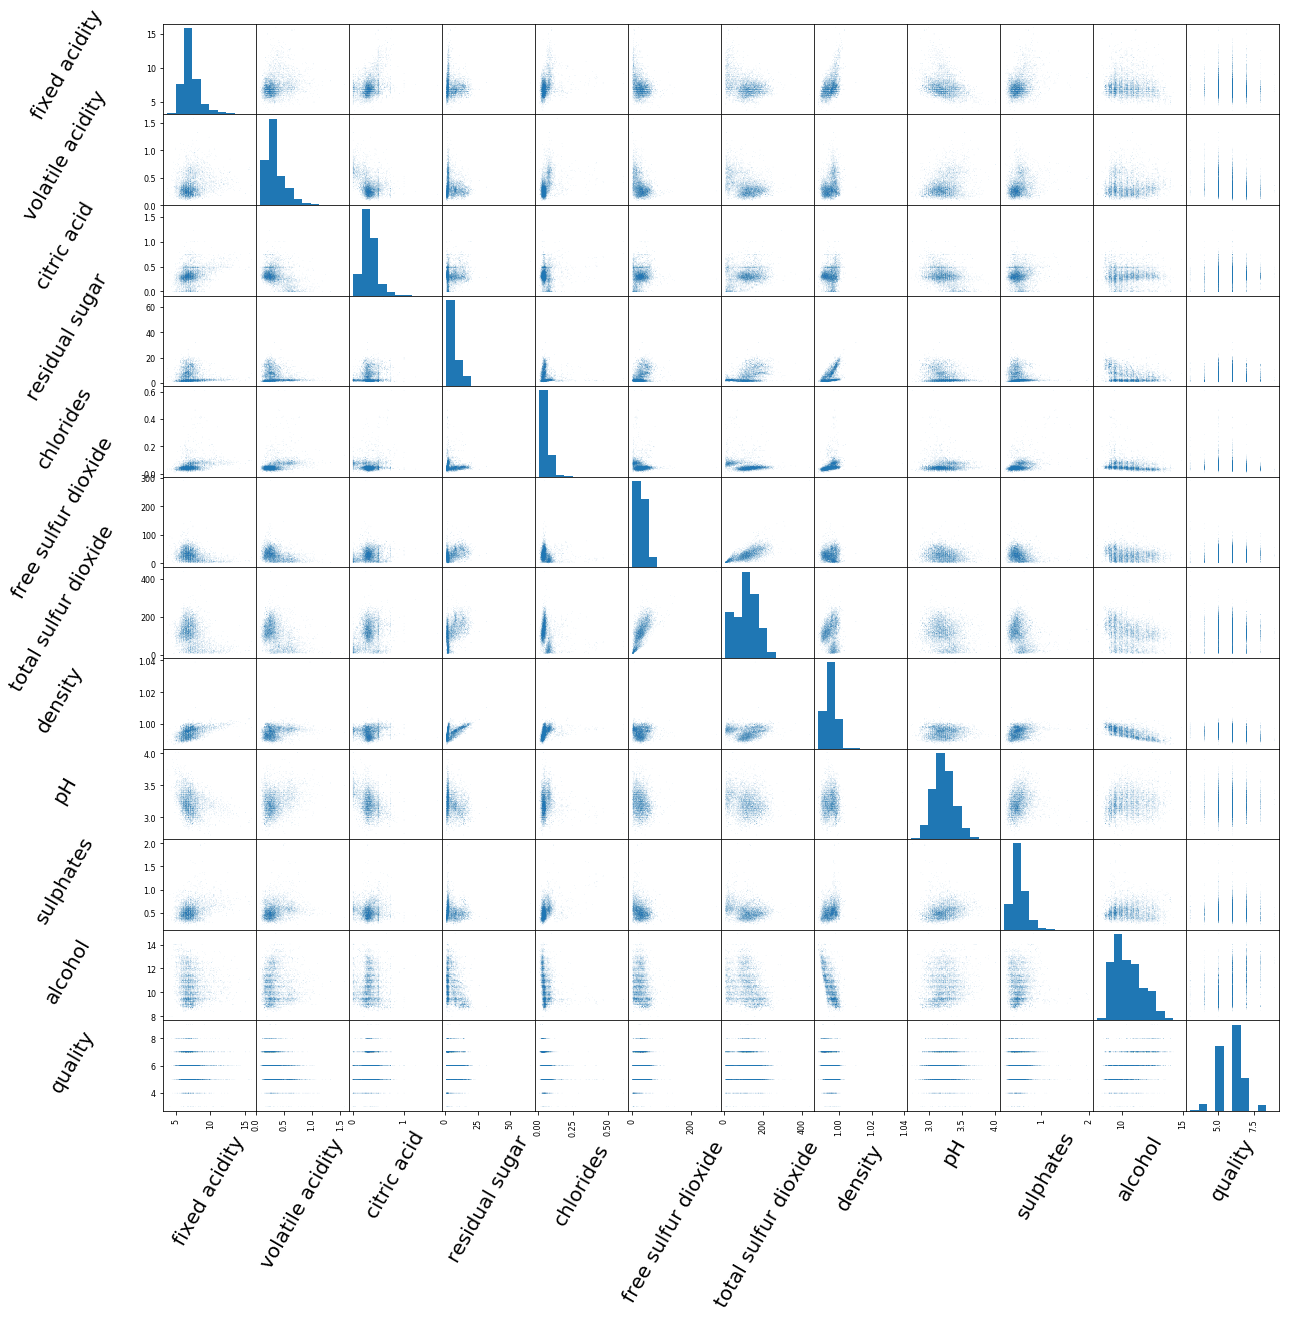

In [41]:
scatter_matrix = pd.scatter_matrix(
    winedf,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png")

<h2>Wine Quality Indicators</h2>

<h3>1. Alcohol</h3>

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol Percent Box Plots by Wine Quality')]

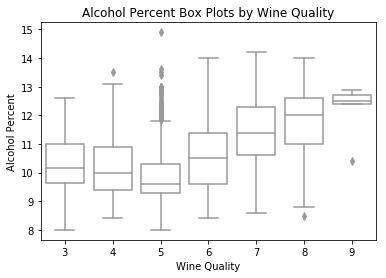

In [42]:
bx = sns.boxplot(x='quality', y='alcohol', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol Percent Box Plots by Wine Quality')



<h3>2. Density</h3>  

[Text(0,0.5,'Density'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Density Box Plots by Wine Quality')]

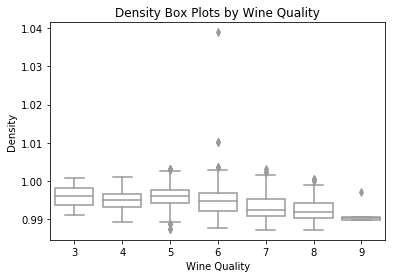

In [43]:
bx = sns.boxplot(x='quality', y='density', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Density', title='Density Box Plots by Wine Quality')


<h3>3. Chlorides</h3>    

[Text(0,0.5,'Chlorides'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Chlorides Box Plots by Wine Quality')]

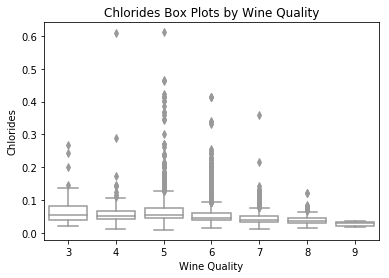

In [44]:
bx = sns.boxplot(x='quality', y='chlorides', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Chlorides', title='Chlorides Box Plots by Wine Quality')


<h3>4. Volatile Acidity</h3>      

[Text(0,0.5,'Volatile Acidity'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Volatile Acidity Box Plots by Wine Quality')]

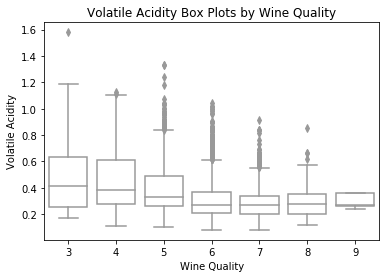

In [45]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Volatile Acidity', title='Volatile Acidity Box Plots by Wine Quality')


<h3>5. Citric Acid</h3>

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Citric Acid Box Plots by Wine Quality')]

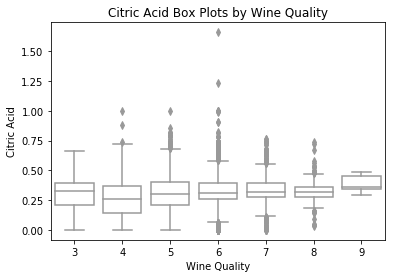

In [46]:
bx = sns.boxplot(x='quality', y='citric acid', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Citric Acid', title='Citric Acid Box Plots by Wine Quality')


<h3>6. Fixed Acidity</h3>  

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Fixed Acidity Box Plots by Wine Quality')]

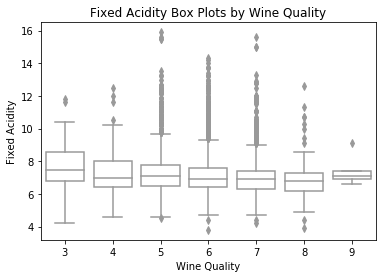

In [47]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Fixed Acidity', title='Fixed Acidity Box Plots by Wine Quality')


<h3>7. Free Sulfur Dioxide</h3>  

[Text(0,0.5,'Free Sulfur Dioxide'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Free Sulfur Dioxide Box Plots by Wine Quality')]

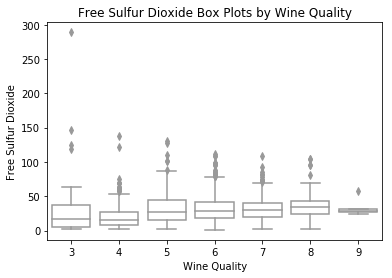

In [48]:
bx = sns.boxplot(x='quality', y='free sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Free Sulfur Dioxide', title='Free Sulfur Dioxide Box Plots by Wine Quality')

<h3>8. Total Sulfur Dioxide</h3> 

[Text(0,0.5,'Total Sulfur Dioxide'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Total Sulfur Dioxide Box Plots by Wine Quality')]

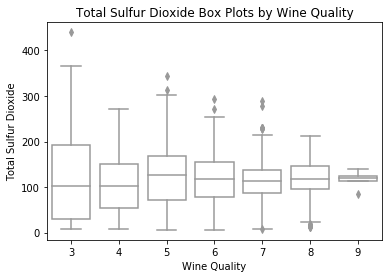

In [49]:
bx = sns.boxplot(x='quality', y='total sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Total Sulfur Dioxide', title='Total Sulfur Dioxide Box Plots by Wine Quality')

<h3>9. pH</h3> 

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'pH Box Plots by Wine Quality')]

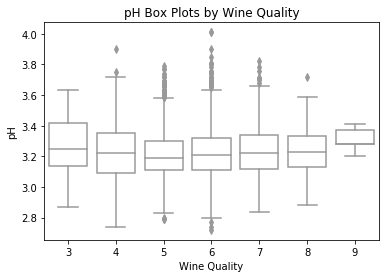

In [50]:
bx = sns.boxplot(x='quality', y='pH', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='pH', title='pH Box Plots by Wine Quality')

<h3>10. Sulphates</h3>

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Sulphates Box Plots by Wine Quality')]

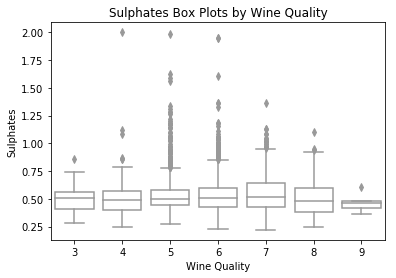

In [51]:
bx = sns.boxplot(x='quality', y='sulphates', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates Box Plots by Wine Quality')


<h3>11. Residual Sugar</h3>

[Text(0,0.5,'Residual Sugar'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Residual Sugar Box Plots by Wine Quality')]

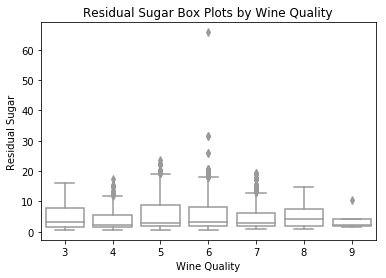

In [52]:
bx = sns.boxplot(x='quality', y='residual sugar', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Residual Sugar', title='Residual Sugar Box Plots by Wine Quality')
